Finished loading sidechannel data.
Finished loading sidechannel data..


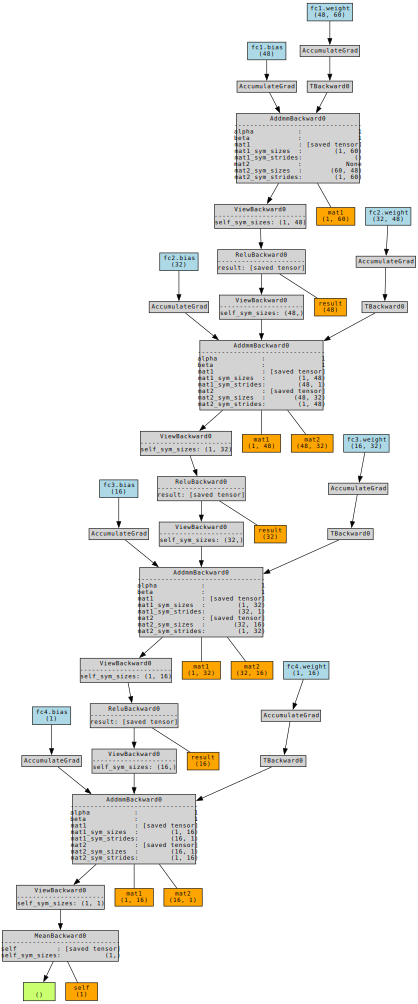

In [1]:
# General
import numpy as np
import csv
import sys
import os
import argparse
from tabulate import tabulate

# Utility class for loading side channel datasets
from classifier_automation import classifierTester

# Data Processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split as tts

# Data Viz
import matplotlib.pyplot as plt

# Warnings
import warnings
from sklearn.exceptions import DataConversionWarning

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Dataset
#results_sc = r'data/usabe_undoc_nonzero.csv'
#results_nosc = r'data/results_undoc_nosc.csv'
results_sc = r'data/sc_buffer.csv'
results_nosc = r'data/nosc_buffer.csv'
#results_sc = r'data/results-3-29-24/div_sc_NOCOL.csv'
#results_nosc = r'data/results-3-29-24/div_nosc_NOCOL.csv'
#results_sc = r'data/results-3-29-24/results_add_sc_NOCOL.csv'
#results_nosc = r'data/results-3-29-24/results_add_nosc_NOCOL.csv'

#results_sc = "data/results_samemeasure_sc.csv"
#results_nosc = "data/results_samemeasure_nosc.csv"


def get_perftrigger_headers():
    #csv = 'data/results_samemeasure_sc.csv'
    csv = 'data/sc_buffer.csv'
    f = open(csv)
    return f.read().split('\n')[0].split(',')

# Define network
class network(nn.Module):
    def __init__(self, input_size):
        super(network, self).__init__()
        self.fc1 = nn.Linear(input_size, 48)
        self.fc2 = nn.Linear(48, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

X, y = classifierTester.get_training_data(results_sc, results_nosc)

one_x = X[0]
one_y = y[0]

from torchviz import make_dot

model = network(60)

y = model(torch.Tensor(one_x))

make_dot(y.mean(), params=dict(model.named_parameters()), show_attrs=True, show_saved=True)

